In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

## Trapezoid Rule
Approximate $f$ on each small interval by a straight line.
For one interval $[a,b]$:
$$ Q_T = \frac{b-a}{2}\big(f(a)+f(b)\big). $$
For $n$ equal subintervals ($h=(b-a)/n$):
$$ Q_T = h\Big[\tfrac12 f(x_0) + f(x_1)+\cdots+f(x_{n-1}) + \tfrac12 f(x_n) \Big]. $$
Error (global) if $f''$ is continuous:
$$ E_T = I-Q_T = -\frac{(b-a)}{12} f''(\xi) h^2 \quad (\text{for some }\xi\in(a,b)). $$
So the trapezoid rule is second-order: error decreases like $\mathcal O(h^2)$.


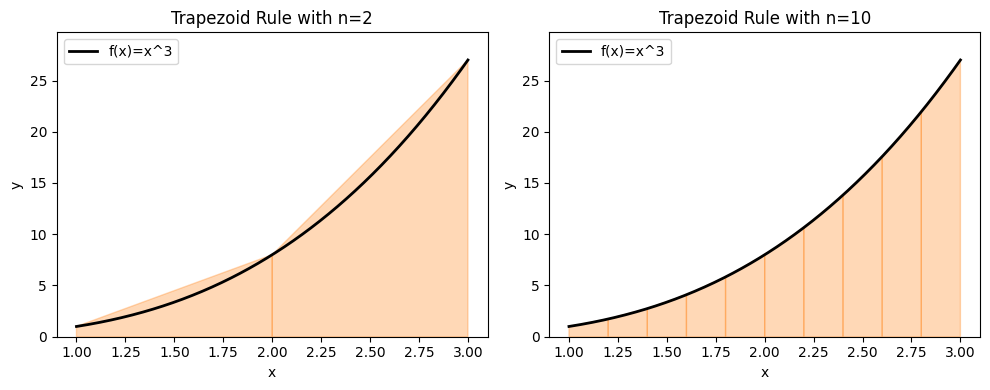

n=  1: trapezoid = 28.0000000000, error = -8.000e+00
n=  2: trapezoid = 22.0000000000, error = -2.000e+00
n= 10: trapezoid = 20.0800000000, error = -8.000e-02
n=100: trapezoid = 20.0008000000, error = -8.000e-04
Exact integral = 20.0000000000


In [18]:
# Trapezoid Rule Illustration
import numpy as np
import matplotlib.pyplot as plt

# Function and exact integral for f(x)=x^3 on [1,3]
def f(x):
    return x**3

a, b = 1.0, 3.0
exact = (b**4 - a**4)/4  # integral of x^3 dx = x^4/4

# Composite trapezoid rule implementation
def trapezoid(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

# Helper to plot trapezoids
def plot_trapezoids(n, ax):
    x = np.linspace(a, b, n+1)
    y = f(x)
    ax.plot(np.linspace(a, b, 400), f(np.linspace(a, b, 400)), 'k', lw=2, label='f(x)=x^3')
    ax.set_title(f'Trapezoid Rule with n={n}')
    ax.set_xlim(a-0.1, b+0.1)
    ax.set_ylim(0, f(b)*1.1)
    # Draw trapezoids
    for i in range(n):
        xs = [x[i], x[i], x[i+1], x[i+1]]
        ys = [0, y[i], y[i+1], 0]
        ax.fill(xs, ys, alpha=0.3, edgecolor='C1', facecolor='C1')
    ax.legend(loc='upper left')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# Compare a coarse and a finer subdivision
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for n, ax in zip([2, 10], axes):
    plot_trapezoids(n, ax)
plt.tight_layout()
plt.show()

# Numerical results
for n in [1, 2, 10, 100]:
    approx = trapezoid(f, a, b, n)
    err = exact - approx
    print(f'n={n:3d}: trapezoid = {approx:.10f}, error = {err:.3e}')

print(f'Exact integral = {exact:.10f}')



#### Error Bound Example (Trapezoid)
If $|f''(x)| \le M$ on $[a,b]$, then the composite trapezoid error satisfies
$$ |E_T| \le \frac{(b-a)}{12} M h^2. $$
We will use this form later to decide how many subintervals are needed.



---

### Where Does the Trapezoid Error Formula Come From? [Not in Exam, Just for keen souls]

Consider one subinterval $[x_k, x_{k+1}]$ with width $h$. Expand $f$ about the left endpoint $x_k$ (a similar result holds expanding about the midpoint; either way we get the same order):
$$ f(x) = f(x_k) + f'(x_k)(x-x_k) + \tfrac12 f''(x_k)(x-x_k)^2 + \tfrac16 f^{(3)}(\xi_x)(x-x_k)^3. $$
Integrate from $x_k$ to $x_{k+1}$ (let $t = x - x_k$):
$$ \int_{x_k}^{x_{k+1}} f(x)\,dx = f(x_k) h + f'(x_k)\tfrac{h^2}{2} + f''(x_k)\tfrac{h^3}{6} + \mathcal O(h^4). $$

Do the same expansion at the right endpoint $x_{k+1}$ (or reflect the above) to eliminate the first derivative term. Adding the two expansions and dividing by 2 (this is exactly what the trapezoid formula does by averaging endpoint values) yields the single–interval trapezoid approximation:
$$ Q_k^{T} = \tfrac{h}{2}\big(f(x_k) + f(x_{k+1})\big) = \int_{x_k}^{x_{k+1}} f(x)\,dx - \tfrac{h^3}{12} f''(\eta_k) + \mathcal O(h^4) $$
for some $\eta_k \in (x_k, x_{k+1})$. Thus the local truncation error is order $h^3$.

Summing over $n = (b-a)/h$ intervals:
$$ E_T = \sum_{k=0}^{n-1} \Big(- \tfrac{h^3}{12} f''(\eta_k) + \mathcal O(h^4)\Big) = -\tfrac{h^3}{12}\sum_{k=0}^{n-1} f''(\eta_k) + \mathcal O(n h^4). $$
Because $n h^3 = (b-a) h^2$ and $n h^4 = (b-a) h^3$ we obtain the global error form
$$ E_T = -\tfrac{(b-a)}{12} f''(\xi) h^2 $$
for some $\xi \in (a,b)$ (by the mean value theorem for sums / integrals). This proves the composite trapezoid rule is second order: $|E_T| = \mathcal O(h^2)$.

#### Practical Error Bound
If we know a bound $M \ge |f''(x)|$ on $[a,b]$, then
$$ |E_T| \le \tfrac{(b-a)}{12} M h^2. $$
This is useful to (1) predict accuracy before computing and (2) choose $n$ so that the estimated bound is below a desired tolerance $\text{TOL}$:
$$ h \le \sqrt{\frac{12\,\text{TOL}}{(b-a) M}} \quad \Longrightarrow \quad n \ge \frac{(b-a)}{h}. $$

#### Strategy to Use the Formula
1. Differentiate $f$ twice and bound $|f''|$ on $[a,b]$.
2. Pick tolerance $\text{TOL}$.
3. Solve for $h$ and then $n$.
4. Run composite trapezoid with that $n$.
5. (Optional) Halve $h$ and check the observed error roughly drops by $\approx 4$ (since $((2h)^2)/(h^2) = 4$).

#### Example Sketch (No Execution Here)
For $f(x) = x^3$ on $[1,3]$, $f''(x) = 6x$, so $\max_{x\in[1,3]} |f''(x)| = 18$. Bound gives
$$ |E_T| \le \tfrac{(3-1)}{12} 18 h^2 = 3 h^2. $$
So to get error $< 10^{-4}$, need
$$ 3 h^2 < 10^{-4} \;\; \Longrightarrow \;\; h < \sqrt{\tfrac{10^{-4}}{3}} \approx 0.00577 \;\; \Longrightarrow \;\; n > \frac{2}{0.00577} \approx 347. $$

This conservative estimate ($n \approx 347$) will likely overshoot the required $n$ because the constant derived from the exact $f''(\xi)$ may be smaller than the worst–case bound.


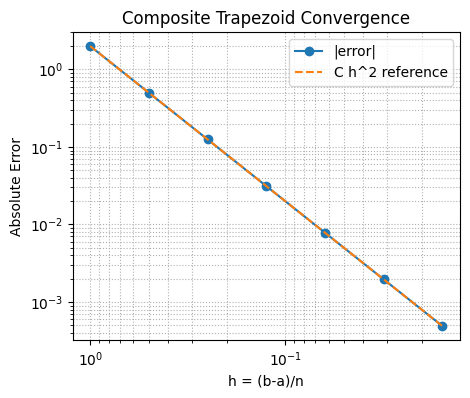

h=1.00000, error=2.000e+00
h=0.50000, error=5.000e-01
h=0.25000, error=1.250e-01
h=0.12500, error=3.125e-02
h=0.06250, error=7.812e-03
h=0.03125, error=1.953e-03
h=0.01562, error=4.883e-04
Estimated order ≈ -2.0000 (expected 2)


In [19]:
# Convergence order demonstration for the composite trapezoid rule
import numpy as np
import matplotlib.pyplot as plt

# Reuse f, a, b, exact, trapezoid if already defined above; redefine defensively otherwise
try:
    f
except NameError:
    def f(x):
        return x**3
    a, b = 1.0, 3.0
    exact = (b**4 - a**4)/4

try:
    trapezoid
except NameError:
    def trapezoid(f, a, b, n):
        x = np.linspace(a, b, n+1)
        y = f(x)
        h = (b - a) / n
        return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

ns = np.array([2, 4, 8, 16, 32, 64, 128])  # powers of two for clean ratios
hs = (b - a) / ns
errors = []
for n in ns:
    approx = trapezoid(f, a, b, int(n))
    errors.append(abs(exact - approx))
errors = np.array(errors)

# Linear regression on log-log to estimate slope
p = np.polyfit(np.log(hs), np.log(errors), 1)
order_est = -p[0]  # slope is ~2 but negative because error decreases with h

plt.figure(figsize=(5,4))
plt.loglog(hs, errors, 'o-', label='|error|')
plt.loglog(hs, errors[0]*(hs/hs[0])**2, '--', label='C h^2 reference')
plt.gca().invert_xaxis()  # optional: decreasing h left to right
plt.xlabel('h = (b-a)/n')
plt.ylabel('Absolute Error')
plt.title('Composite Trapezoid Convergence')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

for h, e in zip(hs, errors):
    print(f'h={h:.5f}, error={e:.3e}')
print(f'Estimated order ≈ {order_est:.4f} (expected 2)')
